In [49]:
# загрухка необходимых библиотек
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [50]:
# загрузим данные
data = pd.read_csv('advertising.zip', sep=',')

# сразу удалим лишний столбец Unnamed: 0
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [51]:
# Проверяем, есть-ли пропуски в данных
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [52]:
#ваш код 

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [53]:
# Преобразуем признаки в массивы numpy
X = np.array(data[['TV', 'radio', 'newspaper']])
y = np.array(data['sales'])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [54]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [55]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [56]:
# ваш код

num_iter = 1000
m = X.shape[0] # количество строк
n = X.shape[1] # количество столбцов
w = np.zeros((n, 1)) # инициализируем веса нулями

for i in range(num_iter):
    for k in range(n):        
        # вычисляем прогноз без k-го признака
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])        
        
        # обновляем новое значение k-го веса
        w[k] = (X[:,k].T @ (y - h)) #/ (X[:,k].T @ X[:,k]
        
        
        # вычисляем функцию потерь
        cost = sum((X @ w - y) ** 2) / (len(y))
        
print(w)

[[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [57]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [58]:
#отмастштабируем столбцы исходной матрицы X. Для этого вычтем из каждого столбца его среднее значение и поделим на стандартное отклонение
X = (X - X.mean(axis=0)) / X.std(axis=0)

**Добавим единичный столбец**

In [59]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [60]:
# создадим функцию mse_error, которая будет вычислять среднеквадратичную ошибку, принимающую на вход вектор предсказаний и вектор истинных значений
def mse_error(y_pred, y_true):
    return np.sum(np.square(y_pred - y_true)) / len(y_true)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [61]:
# сделаем наивное предсказание, в котором мы будем предсказывать среднее значение целевой переменной
y_pred = np.ones(y.shape) * y.mean()
print(mse_error(y_pred, y))

27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [62]:
def lin_pred(
        X_:np.ndarray, 
        w_:np.ndarray
    ) -> np.ndarray:

    # преобразуем вектор в одномерный массив
    w_ = w_.reshape(-1, 1)
    
    # получаем вектор прогнозов линейной модели, 
    # преобразуем в одномерный массив
    return (X_ @ w_).reshape(-1, 1)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [63]:

def stoch_grad_step(
        X_:np.ndarray, 
        y_:np.ndarray, 
        w_:np.ndarray, 
        train_ind:int, 
        eta:float
    ) -> np.ndarray:

    # вычисляем разницу между предсказанным и реальным значением
    diff = lin_pred(X_[train_ind], w_) - y_[train_ind]

    # вычисляем направление изменения весов модели
    direction = X_[train_ind, :] * 2 * diff / len(y_)
    
    # обновляем веса (коэффициенты) модели
    return  w_ - direction * eta

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [64]:
def stochastic_gradient_descent(
        X_:np.ndarray=X, 
        y_:np.ndarray=y, 
        w_init:np.ndarray=w, 
        eta:float=0.01, 
        max_iter:int=1e5, 
        min_weight_dist:float=1e-8
    ) -> np.ndarray | list[float]:
    
    # задаём расстояние между векторами весов
    weight_dist = np.inf

    # создаём пустой массив для фиксации MSE
    mse_ = np.array([])

    # создаём счетчик итераций
    iter_num = 0

    # задаём начальный вектор весов
    w = w_init

    # выполняем цикл пока расстояние между векторами весов больше того,
    # при котором будет прекращена работа и количество итераций меньше максимума
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # задаём случайный индекс
        random_index = np.random.randint(len(y))

        # записываем в переменную текущий шаг стохастического спуска
        w_new = stoch_grad_step(X_, y_, w, random_index, eta)

        # вычисляем текущее расстояние между векторами весов
        weight_dist = np.linalg.norm(w - w_new)

        # вычисляем MSE
        mse_ = np.append(mse_, mse_error(y, lin_pred(X, w)))

        # обновляем вектор весов и индекс итерации
        w = w_new
        iter_num += 1

    return w, mse_

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [66]:
# задаём вектор весов модели
w = np.zeros(X.shape[1])

# выполняем алгоритм стохастического градиентного спуска, получаем результаты
w_stoch_grad_desc, mse_stoch_grad_desc = stochastic_gradient_descent(X, y, w)



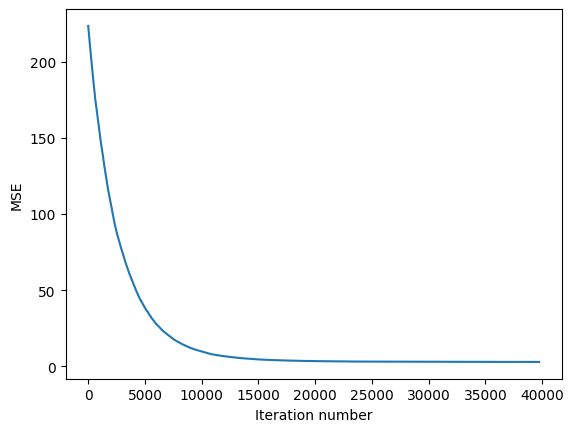

In [67]:
# построим график зависимости ошибки от числа итераций

plt.plot(range(len(mse_stoch_grad_desc)), mse_stoch_grad_desc)
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [68]:
w_stoch_grad_desc

array([[7.01062464, 7.01062464, 3.83698157, 2.69826276, 0.08060106]])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [74]:
print(f'MSE на последней итерации: {mse_stoch_grad_desc[-1]:.3f}')

MSE на последней итерации: 2.803


In [75]:
# сравним с sklearn

print(f'Метрика MSE (sklearn): {metrics.mean_squared_error(y, lin_pred(X, w_stoch_grad_desc)):.3f}')

Метрика MSE (sklearn): 2.803
Метрика MAE (sklearn): 1.262


Полностью совпало! )